## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# ignoring the warnings
#import warnings
#warnings.filterwarnings("ignore")

## Loading The DataSet

In [2]:
data=pd.read_csv("titanic_data.csv")
data.head(10)
# Pclass = class of passenger , Sibsp = wheteher the person has spouse on that ship
# parch = The number of children and parents a passenger has aboard the ship

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Types of Features :**
- **Categorical** -Sex, and Embarked.
- **Continous** -Age,Fare
- **Discrete** -Sibsp,Parch.
- **Alphanumeric** -Cabin

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


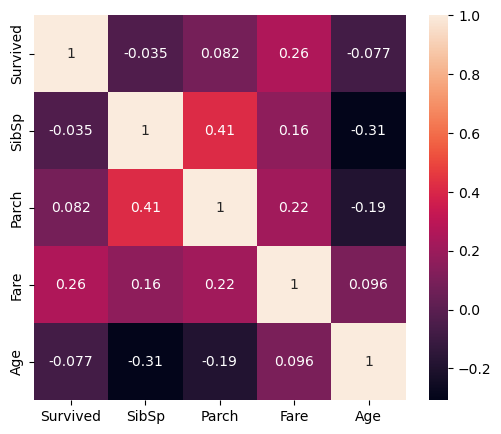

In [6]:
plt.figure(figsize=(6,5))
heatmap=sns.heatmap(data[["Survived","SibSp","Parch","Fare","Age"]].corr(),annot=True)

Here it is showing that age is not a determing data but that is not true

## <font color="green">Sibsp = NO of Sibling or spouses aboard the Ship</font>

In [7]:
data["SibSp"].nunique()

7

In [8]:
data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

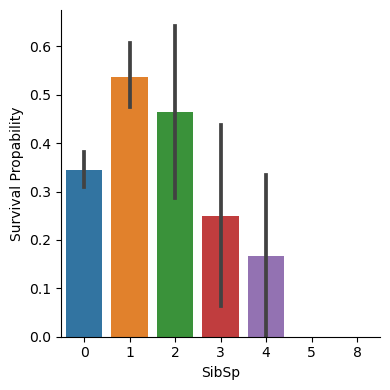

In [9]:
sns.catplot(x="SibSp",y="Survived",data=data,kind="bar",height=4).set_ylabels("Survival Propability")
# factorplot is removed use this insted

## <font color="green">Age</font>

C:\Users\hudai\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\hudai\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


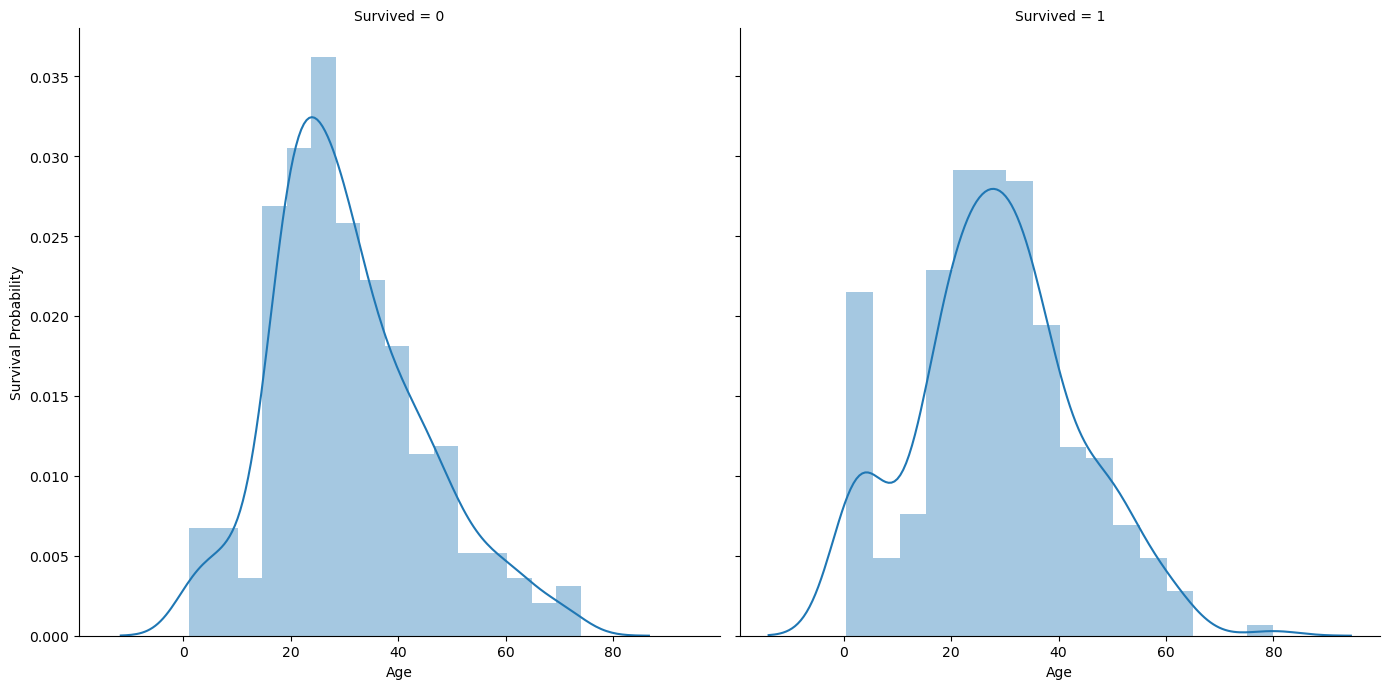

In [10]:
age_visual=sns.FacetGrid(data,col="Survived",height=7)
age_visual=age_visual.map(sns.distplot,"Age").set_ylabels("Survival Probability")

if you see the heatmap age was not corelated with the survival one but you can still see that there is an age category of passengers that have more or less chance of survival so heat map stand alone cannot say every thing therefor you need to do further analysis

## <font color="green">Sex</font>

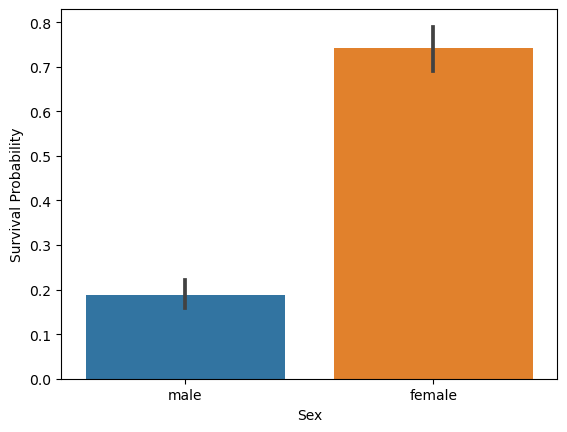

In [11]:
age_plot=sns.barplot(x="Sex",y="Survived",data=data).set_ylabel("Survival Probability")

In [12]:
data[['Sex','Survived']].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


## <font color="green">PClass</font>

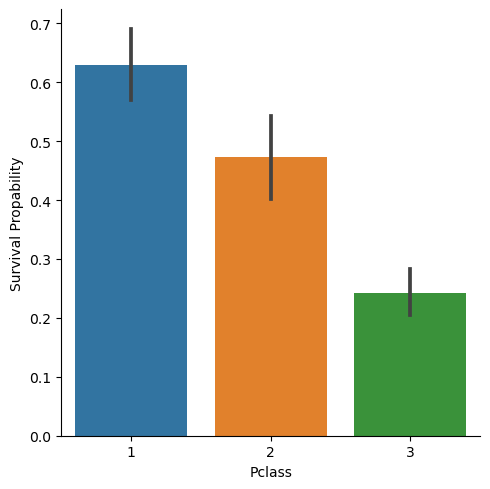

In [13]:
pclass=sns.catplot(x="Pclass",y="Survived",data=data,kind="bar",height=5)
pclass=pclass.set_ylabels("Survival Propability")

### <font color="green">Sex And PClass</font>

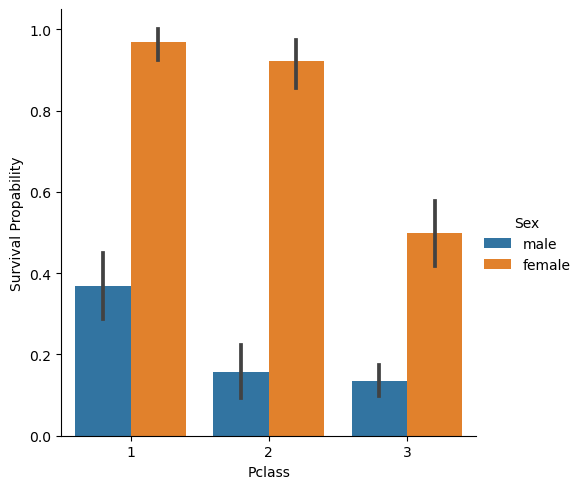

In [14]:
pclass=sns.catplot(x="Pclass",y="Survived",data=data,kind="bar",height=5,hue="Sex")
pclass=pclass.set_ylabels("Survival Propability")

## <font color="green">Embarked</font>

In [15]:
data["Embarked"].isnull().sum()

2

In [16]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

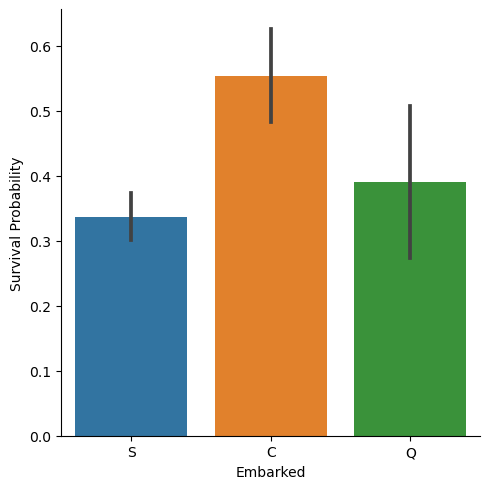

In [17]:
g=sns.catplot(x="Embarked",y="Survived",data=data,height=5,kind="bar")
g=g.set_ylabels("Survival Probability")

Since it is showing it has an affect on the model but it shoudnt sice all were victim towards the tragedy equally
we need to prove it by using different visualising methods

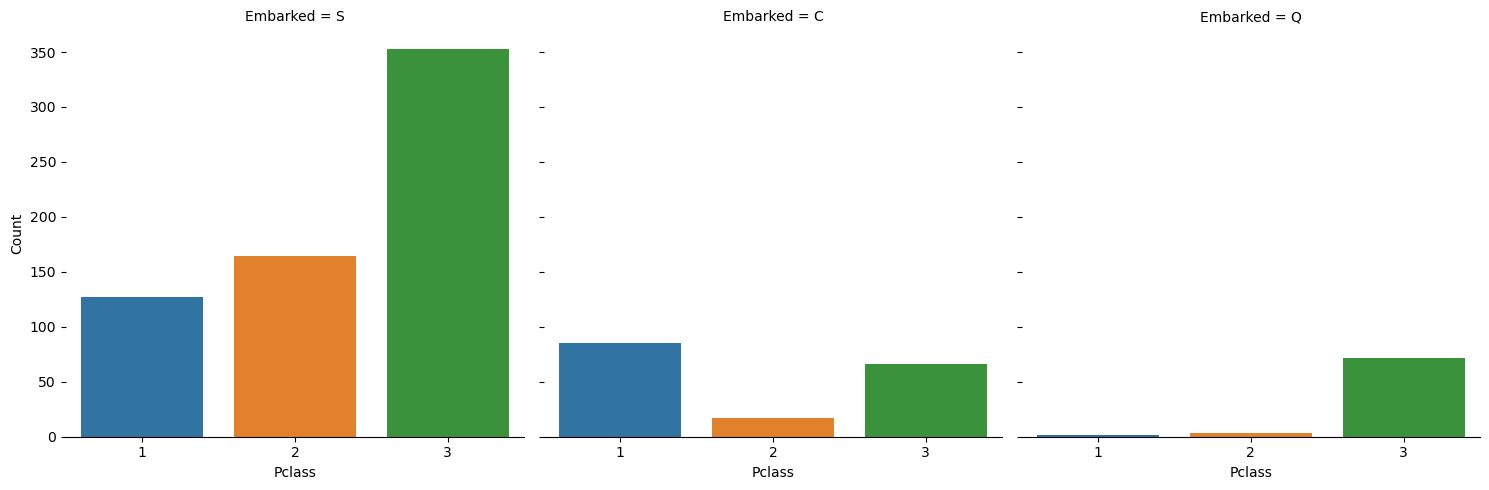

In [18]:
g = sns.catplot(x="Pclass", col="Embarked", data=data, height=5, kind="count")
g.despine(left=True)# Remove the top and right spines from the plot
g.set_ylabels("Count")# Set the y-axis labels for each subplot

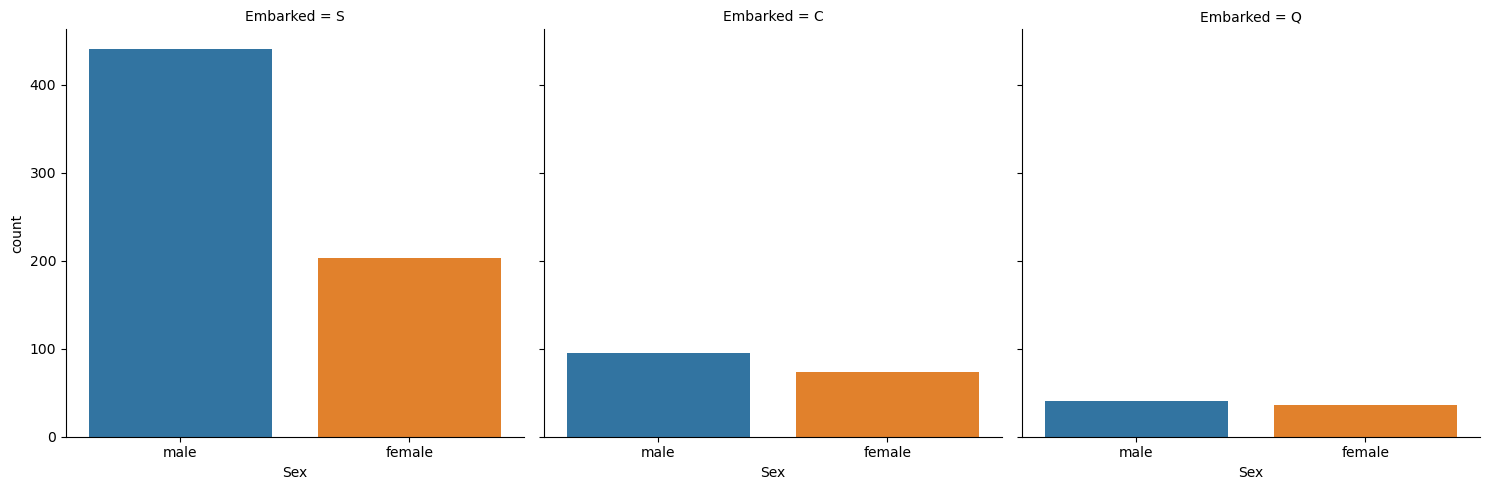

In [19]:
g = sns.catplot(x="Sex", col="Embarked", data=data, height=5, kind="count")

## Preparing Data

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here for age there is many missing value we dont want to take mean value since the number of null values are many

While chcking the age distribution graph we can see a bell-shaped curve making a standard or normal distribution . so where ever the value is null we would randomly give values within the range of the mean the peak where most of the data exist

In [22]:
mean=data["Age"].mean()
std=data["Age"].std()
is_null=data["Age"].isnull().sum()

In [23]:
print(mean,std,is_null)

29.69911764705882 14.526497332334044 177


In [24]:
rand_age=np.random.randint( mean-std ,mean+std ,size=is_null )

In [25]:
rand_age

array([30, 26, 22, 23, 20, 25, 36, 19, 19, 21, 30, 30, 26, 31, 41, 27, 23,
       21, 15, 24, 38, 37, 19, 34, 25, 26, 29, 35, 34, 41, 30, 35, 28, 19,
       17, 42, 41, 24, 25, 22, 25, 27, 33, 15, 29, 27, 24, 15, 28, 22, 25,
       17, 17, 35, 39, 20, 39, 38, 23, 29, 34, 31, 31, 31, 37, 38, 30, 19,
       15, 34, 34, 37, 31, 28, 15, 20, 18, 26, 27, 41, 20, 26, 38, 28, 38,
       16, 22, 19, 17, 17, 38, 17, 39, 33, 36, 36, 41, 39, 16, 33, 21, 17,
       26, 19, 42, 30, 30, 39, 29, 34, 42, 25, 28, 19, 20, 21, 34, 36, 36,
       20, 19, 15, 32, 18, 18, 29, 39, 41, 26, 19, 21, 26, 23, 36, 15, 35,
       39, 30, 39, 32, 20, 28, 43, 37, 34, 39, 31, 31, 23, 24, 43, 18, 23,
       20, 20, 32, 36, 18, 29, 19, 19, 19, 39, 22, 26, 37, 30, 22, 38, 18,
       21, 36, 31, 34, 37, 32, 30])

In [26]:
type(rand_age)

numpy.ndarray

In [27]:
a=data["Age"].copy() # dummy variable to have my data

In [28]:
np.isnan(a) # True if it is Null

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [29]:
a[np.isnan(a)]=rand_age
data["Age"]=a

In [30]:
data["Age"].isnull().sum()

0

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
data["Embarked"]=data["Embarked"].fillna("S")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
col_to_drop={"PassengerId","Cabin","Ticket","Name","Embarked"}
data.drop(col_to_drop,axis=1,inplace=True)

In [34]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [35]:
genders={"male":0,"female":1}
data["Sex"]=data["Sex"].map(genders)

In [36]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


## Splitting the data

In [37]:
x=data.drop(data.columns[[0]],axis=1)
y=data["Survived"]
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,3,1,30.0,1,2,23.4500
889,1,0,26.0,0,0,30.0000


In [38]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=0)

## Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
xtrain=sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

## Classification

In [40]:
logreg=LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000)

In [41]:
logreg.fit(xtrain,ytrain)
svc_classifier.fit(xtrain,ytrain)
dt_classifier.fit(xtrain,ytrain)
knn_classifier.fit(xtrain,ytrain)
rf_classifier.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=1000)

In [42]:
logreg_ypred=logreg.predict(xtest)
svc_classifier_ypred=svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = dt_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [43]:
from sklearn.metrics import accuracy_score

logreg_acc=accuracy_score(ytest,logreg_ypred)
svc_classifier_acc=accuracy_score(ytest,svc_classifier_ypred)
dt_classifier_acc=accuracy_score(ytest,dt_classifier_ypred)
knn_classifier_acc=accuracy_score(ytest,knn_classifier_ypred)
rf_classifier_acc=accuracy_score(ytest,rf_classifier_ypred)

In [44]:
print("Logistic Regression : ",round(logreg_acc*100,2))
print("Support Vector      : ",round(svc_classifier_acc*100,2))
print("Decision Tree       : ",round(dt_classifier_acc*100,2))
print("K-NN Classifier     : ",round(knn_classifier_acc*100,2))
print("Random Forest       : ",round(rf_classifier_acc*100,2))

Logistic Regression :  78.73
Support Vector      :  80.97
Decision Tree       :  76.87
K-NN Classifier     :  76.87
Random Forest       :  83.58
